## <p style="text-align:center;">Bank Churn Predictor Model Project</p>
<p style="text-align:center;">By Alfredo Saldana</p>
<p style="text-align:center;"><a href="https://github.com/alfredosaldana">github.com/alfredosaldana</a></p>
<p style="text-align:center;"><a href="https://www.linkedin.com/in/asaldanamle/">linkedin.com/in/asaldanamle</a></p>


# 1. Problem Definition and Objective
**1.1 Problem:** In today’s competitive financial market, customer retention is a critical factor for long-term business success. Despite efforts to attract new clients, many banks face the challenge of losing existing customers to competitors. Customer churn, or the phenomenon of customers leaving the bank, can result in significant revenue loss and increased acquisition costs.

While banks often focus on enhancing market penetration, improving operational efficiency, and developing new products, these efforts must be complemented by a proactive strategy to understand and prevent customer attrition. Monitoring customer behavior and identifying patterns that signal dissatisfaction or potential churn is vital for staying ahead of competitors. Without a clear understanding of why customers are leaving, it becomes difficult to implement effective countermeasures.

**1.2 Objective:** The primary goal of this project is to develop a machine learning model that accurately predicts whether a customer is likely to leave the bank, or 'exit.' By identifying potential churners in advance, the bank can take strategic actions to mitigate customer attrition. The ability to predict customer behavior with data-driven insights will empower the bank to deploy personalized retention strategies, such as targeted marketing campaigns, loyalty programs, and special product offers.

In addition, the model’s predictions can help the bank enhance its Customer Relationship Management (CRM) efforts by improving communication and engagement with at-risk customers. With a better understanding of customer needs and pain points, the bank can proactively address issues, thus fostering stronger customer loyalty. Ultimately, this predictive model will serve as a key tool for the bank to maintain its customer base, reduce churn, and drive sustainable growth.


## 2. Gathering Data

**2.1 Data collection and Import Data:** The data was obtained from Kaggle.com, https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn?select=Customer-Churn-Records.csv

Now lets import the data, which is in the form of a csv file located in the same folder of this Jupiter Notebook that is why the data could be called using pd.read_csv('Customer-Churn-Records.csv'), otherwise within the quotations the specific path needs to be placed example pd.read_csv(r'c:\projects\python').

In regular Python strings, the backslash (\\) is an escape character, meaning it signals that the next character has a special
meaning (e.g., \n for a new line or \t for a tab). Without the r, you'd need to escape each backslash in the file path, like
this: pd.read_csv('c:\\projects\\python')





In [4]:
# Importing libraries that will be used
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# lets import the data and create a DataFrame df
df = pd.read_csv('Customer-Churn-Records.csv')

In [6]:
type(df)

pandas.core.frame.DataFrame

# 2.2 Data Exploring EDA:
The dataset used for this analysis contains 10,000 records (instances) and 18 features (dimensions), representing a wide range of customer information. These features can be broadly categorized into two types:

- Numerical Features: These include variables such as CreditScore, Age, Balance, and EstimatedSalary. These continuous variables provide key insights into a customer's financial profile and can help reveal patterns or behaviors associated with churn.

- Categorical Features: Variables such as Geography (indicating the customer's location) and Gender are examples of categorical data. These features capture non-numerical information that may still play a crucial role in predicting customer exit behavior.

The dependent variable, or target, in this dataset is labeled Exited. This binary class variable has two possible outcomes:

- Exited=0: The customer did not leave the bank.
- Exited=1: The customer left the bank.

Since the dataset includes a predefined target variable (Exited), this is a supervised analysis. The goal is to use the available features to predict whether a customer will leave the bank, making this a classification problem. Given that the dependent variable is categorical (with two classes: Exited=0 or Exited=1), the machine learning models we will employ are classification models. These models will help in accurately classifying customers based on their likelihood to exit or stay with the bank, using the available features.

In [261]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [10]:
df.shape

(10000, 18)

# 3. Data Cleaning and Preprocessing
In this case, the dataset provided is already clean, with no missing or null values. This is typical for educational or pre-processed datasets, where common data issues have been addressed in advance. However, in real-world applications, raw data is rarely perfect and often requires extensive cleaning and preprocessing before it can be used to build reliable machine learning models.

Some common issues that would typically need to be addressed include:

- Missing Data: Real datasets often have gaps, where certain features are missing for some instances. Techniques like imputation (replacing missing values with mean, median, or mode) or more advanced methods can help resolve this.

- Outliers: Extreme values that deviate significantly from other data points can distort model predictions. Identifying and either removing or adjusting outliers is an important step in preprocessing.

- Imbalanced Data: In cases where the target variable (e.g., churned vs. non-churned customers) is skewed toward one class, model performance can be biased. Balancing techniques such as oversampling the minority class or undersampling the majority class may be necessary.

- Duplicate Data: Redundant entries can skew results and inflate the dataset, leading to unreliable predictions. Identifying and removing duplicates helps maintain the integrity of the data.

- Inconsistent Data Types: Features must be in a consistent format for effective model training. This may involve converting categorical data to numerical values using encoding techniques, or standardizing numeric features.

Although the dataset in this project does not suffer from these issues, understanding and addressing them is essential when working with real-world data to ensure that the models are both accurate and generalizable.

In [12]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [13]:
#Drop features that will not be part of the analysis like: 'RowNumber', 'CustomerId', 'Surname'
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [14]:
data = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Complain','Satisfaction Score', 'Card Type', 'Point Earned'],axis=1)

In [15]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
# a quick view of the dataset. using method .describe() and .transpose() that help to visualize the main characteristics
# of the data
round(data.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,651.0,97.0,350.0,584.0,652.0,718.0,850.0
Age,10000.0,39.0,10.0,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,5.0,3.0,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,76486.0,62397.0,0.0,0.0,97199.0,127644.0,250898.0
NumOfProducts,10000.0,2.0,1.0,1.0,1.0,1.0,2.0,4.0
HasCrCard,10000.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
IsActiveMember,10000.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
EstimatedSalary,10000.0,100090.0,57510.0,12.0,51002.0,100194.0,149388.0,199992.0
Exited,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## 4. Feature Engineering
Feature engineering is a crucial step in preparing the dataset for machine learning, as it directly influences model performance. This process involves selecting, transforming, and encoding features to create a more informative dataset. The following steps outline the feature engineering approach taken in this analysis:

- **Feature Selection:** Personal information features, such as names or identifiers that could compromise customer privacy, have been removed from the dataset. This step not only ensures compliance with data protection regulations but also focuses the analysis on relevant features that contribute meaningfully to the predictive model. The remaining features will be utilized in this analysis to provide insights into customer behavior.

- **Handling Imbalanced Features:** In this dataset, the class variable (Exited) is imbalanced, with approximately 80% of the samples belonging to one class and the remaining 20% to the other. This imbalance can lead to biased model predictions, as the model may become overly sensitive to the majority class. Techniques such as resampling (oversampling the minority class or undersampling the majority class) or using specialized algorithms designed for imbalanced datasets will be considered to ensure fair representation of both classes in the training process.

- **Feature Transformation:**

    - **Scaling:** Normalization or standardization methods will be applied to the numerical features, especially because the algorithms employed will be based on distance calculations among data points. Scaling ensures that each feature contributes equally to the model and helps improve convergence during training. This scaling can be performed either before or after splitting the dataset into features (X) and target (y).

    - **Encoding Categorical Variables:** Categorical features, such as Geography and Gender, will be transformed into numerical values to make them suitable for machine learning algorithms. Methods such as one-hot encoding (creating binary columns for each category) or label encoding (assigning a unique integer to each category) will be employed to ensure that the model can interpret these features effectively.

By carefully selecting, transforming, and encoding features, we aim to create a robust dataset that enhances the model's ability to predict customer churn accurately.

In [18]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 4.1 Handling Categorical Variables
The dataset contains several categorical variables, each with distinct categories that need to be transformed into a numerical format suitable for machine learning algorithms. To accomplish this, we will use the .get_dummies() method from the pandas library to perform one-hot encoding.

For each categorical variable, we will identify the categories present. One important consideration is the "dummy variable trap," which occurs when one category is perfectly collinear with the others. To avoid this issue, we will drop one class from each categorical feature during the encoding process. By doing so, we can ensure that the resulting dummy variables do not introduce redundancy into the model, allowing it to learn effectively without being biased by collinearity.

This approach will facilitate the model’s ability to interpret categorical data, as each remaining category will be represented as a separate binary feature. For instance, if a categorical variable has three categories, we will create two binary variables, each representing the presence or absence of those categories. This transformation enhances the model's capacity to learn from the data while preserving the necessary information from the original features.

In [19]:
unique_geography = data['Geography'].unique()
unique_gender = data['Gender'].unique()


print(unique_geography)
print(unique_gender)



['France' 'Spain' 'Germany']
['Female' 'Male']


In [20]:
data_dummies = pd.get_dummies(data = data, columns=['Geography','Gender'],drop_first=True)

In [21]:
# notice that from the feature 'Geography' Three dummies were created Geography_France,Geography_Spain,Geography_Germany but
# to avoid the dummy trap the parameter drop_first was set to true, so Geography_France was dropped
# the record that contains France as Geography will contain Geography_Spain = 0 and Geography_Germany =0
# in this case we got the result in string boolean form,
data_dummies.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [22]:
data_dummies.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [23]:
data_dummies= data_dummies[['Geography_Germany','Geography_Spain', 'Gender_Male']].astype(int)

In [24]:
data_dummies.head()

,Geography_Germany,Geography_Spain,Gender_Male
0,0,0,0
1,0,1,0
2,0,0,0
3,0,0,0
4,0,1,0


In [25]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [26]:
pd.concat([data,data_dummies],axis=1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [27]:
data1=pd.concat([data,data_dummies],axis=1).drop(columns=['Geography','Gender'])

In [28]:
data1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


# 4.2 Handling Imbalanced Class Features
Class imbalance occurs when the distribution of classes in a dataset is uneven. In this analysis, nearly 80% of the samples belong to one class, leading to a significant imbalance. When machine learning algorithms are applied to an imbalanced dataset, they can become biased toward the majority class, resulting in misleading accuracy and poor performance on the minority class. This can lead to an inability to accurately identify critical cases, such as customers at risk of leaving the bank.

To address class imbalance, several resampling techniques can be employed to either increase the representation of the minority class or decrease the dominance of the majority class. The following are some commonly used techniques:

**1. Oversampling**
Oversampling involves increasing the number of instances in the minority class to achieve a more balanced dataset. Techniques for oversampling include:

- Random Oversampling: This method involves duplicating existing samples from the minority class to increase its representation. While straightforward, this approach can lead to overfitting, as the model may learn to rely on repeated instances.

- SMOTE (Synthetic Minority Over-sampling Technique): SMOTE generates synthetic samples based on existing minority class instances. By interpolating between minority class samples, this technique creates new, unique instances that help enhance the diversity of the minority class, thus improving model robustness.

**2. Undersampling**
Undersampling reduces the number of instances in the majority class to mitigate its dominance. Techniques for undersampling include:

- Random Undersampling: This method involves randomly removing samples from the majority class. While effective in achieving balance, it can result in the loss of valuable information from the dataset, potentially leading to underfitting.

- Cluster-based Undersampling: In this approach, majority class samples are grouped into clusters using clustering algorithms. From these clusters, representative samples are selected, ensuring that the dataset retains essential information while reducing the overall number of majority class instances.

By employing these resampling techniques, we can create a more balanced dataset that allows machine learning algorithms to learn effectively from both classes. This approach is vital for improving the model's predictive power and ensuring that it accurately identifies customers at risk of exiting the bank.

In our project, we will be using the SMOTE approach to handle the imbalance of the class feature.

In [30]:
data1['Exited'].value_counts()

Exited
0    7962
1    2038
Name: count, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

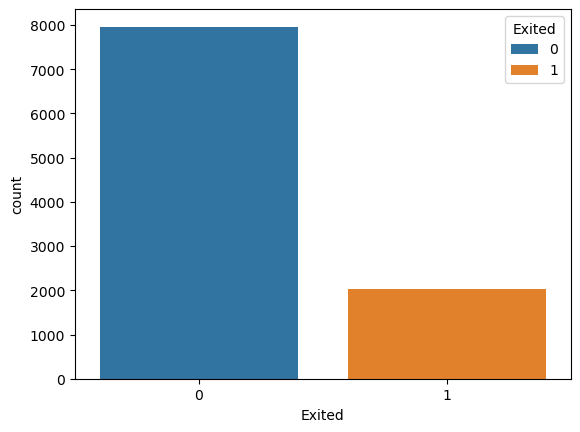

In [31]:
sns.countplot(data=data1,x='Exited',hue='Exited')

In [32]:
# Lets split the data into independent variables 'X' and dependent variables 'y'

X = data1.drop('Exited',axis=1)

In [33]:
y = data1['Exited']

In [34]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [35]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [36]:
# the SMOTE Oversampling technique will be used over our dataset / 
# SMOTE stands for Syntethic Minority Oversampling Technique

from imblearn.over_sampling import SMOTE


In [37]:
 # This classs.method() will syntecally genarate new samples from the minority class, in the background this method 
# uses linear interpolation to create new data. 

X_res,y_res = SMOTE().fit_resample(X,y)

In [38]:
# as we can see the number of y=1 records has increased to the level of the y=0, now both are 7,962 entries
y_res.value_counts()

Exited
1    7962
0    7962
Name: count, dtype: int64

# 5. Data Splitting: Using the train_test_split() Method
Data splitting is a crucial step in the machine learning workflow, as it helps ensure that the model can generalize well to unseen data. To assess the performance of the model accurately, the dataset must be divided into two distinct sets: a training set and a test set.

- Training Set: This subset of the dataset is used to train the machine learning model. The model learns patterns and relationships within the data during this phase. Typically, a larger portion of the data is allocated to the training set to provide the model with sufficient information for learning.

- Test Set: The test set serves as an independent dataset that evaluates the model's performance after training. By using data that the model has not seen before, we can gauge its ability to generalize to new situations and assess its predictive accuracy.

A common practice is to use an 80/20 split, where 80% of the data is allocated to the training set and 20% to the test set. However, this ratio can vary based on factors such as the size of the dataset, the complexity of the problem, and the need for validation. In some cases, a 70/30 or even a 60/40 split may be more appropriate, especially when working with larger datasets.

The train_test_split() method from the scikit-learn library is commonly used to facilitate this process. This function randomly divides the dataset into the specified training and test sets, ensuring that the distribution of classes remains consistent in both subsets. By splitting the data in this manner, we can ensure that our model is trained on a representative sample while maintaining an unbiased evaluation of its performance on unseen data.

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
# it is important to specify the ramdom_state argument that will allow replicability of the random process in further evaluation, it is
# also know as random seed.

X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.2,random_state = 42)

In [42]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
14859,617,53,7,0.00000,1,0,0,142450.951801,0,0,0
11134,791,53,3,0.00000,2,1,1,94165.269192,0,0,0
1665,749,42,1,129776.72000,2,0,1,143538.510000,0,0,1
12152,629,32,6,131017.96584,1,0,0,9300.926769,1,0,0
7402,647,33,7,121260.19000,2,1,0,77216.480000,0,1,1


## Data Standarization

Data standardization is a vital preprocessing step, especially when working with machine learning models that rely on distance calculations, such as k-nearest neighbors, support vector machines, or neural networks. When features are measured on different scales, the model may give undue weight to features with larger ranges, leading to biased or inaccurate results.

To ensure that all features contribute equally to the model, it is essential to transform them to a common scale. One effective method for achieving this is standardization, which involves rescaling the features to have a mean of zero and a standard deviation of one. The standardization formula is given by:

    𝑧 = (x - mean)/ stddev
Where:
- z is the standardized value,
- x is the original value,
- mean is the average of the feature,
- stddev is the standard deviation of the feature.

By applying this transformation, each feature is centered around zero, and its distribution is reshaped to reflect the standard normal distribution. This process allows the model to interpret the significance of each feature without being influenced by the magnitude of its original scale.

Implementing standardization is particularly crucial in this analysis, as it will enhance the performance of algorithms that rely on distance metrics, ensuring that the model accurately reflects the relationships between data points. Ultimately, standardization leads to more reliable and interpretable results, helping to improve the overall effectiveness of the machine learning model.

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
# now lets create an object named: scaler from the class StandardScaler

scaler = StandardScaler()

In [46]:
# now lets use the object scaler to fit and transform the independent variables values

X_train_scaled = scaler.fit_transform(X_train)

In [47]:
# a very important note, with the X_test we only use the scaler.transform not fit, in that way the same statistics that
# were obtained when the X_train were fit are used to transform the X_test, this is to avoid the leakage of data information 
# from the test set to the train set.

X_test_scaled = scaler.transform(X_test)

In [48]:
# the scaler object will be save for future use
import joblib   # to save the scaler and the model
joblib.dump(scaler,'Scaler')

['Scaler']

In [49]:
X_train_scaled                 # note below our data values, they are now standarized

array([[-0.33985804,  1.21118795,  0.80804194, ..., -0.57024963,
        -0.46365264, -0.84598477],
       [ 1.54767676,  1.21118795, -0.66426676, ..., -0.57024963,
        -0.46365264, -0.84598477],
       [ 1.09206491,  0.10560438, -1.40042111, ..., -0.57024963,
        -0.46365264,  1.18205437],
       ...,
       [ 0.20253702,  0.20611198,  1.17611911, ..., -0.57024963,
        -0.46365264,  1.18205437],
       [ 0.35440763,  0.20611198, -0.66426676, ..., -0.57024963,
        -0.46365264, -0.84598477],
       [ 0.52797405,  1.01017276, -1.40042111, ...,  1.75361796,
        -0.46365264,  1.18205437]])

# 5. Now lets use different models to see which fits the best

# Logistic Regression Model


In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
# Here we are using the Python OOP, Object Oriented Programation, creating objects from defined classes
# in this case LG is an object from the class LogisticRegression, and is set to default arguments ()

LG = LogisticRegression()

In [54]:
# now lets fit the object model LG to the X_train_scaled data
LG.fit(X_train_scaled,y_train)

LogisticRegression()

In [55]:
# now we have to use the model to make predictions using the X1_test y_pred1 is what the model has predicted
y_pred1 = LG.predict(X_test_scaled)

In [56]:
# now lets calculate the accuracy of this model
from sklearn.metrics import accuracy_score



In [57]:
accuracy_score(y_test,y_pred1)

0.7899529042386185

In [58]:
from sklearn.metrics import precision_score

In [59]:
precision_score(y_test,y_pred1)

0.764525993883792

In [60]:
from sklearn.metrics import recall_score,f1_score,precision_score,accuracy_score

In [61]:
recall_score(y_test,y_pred1)

0.8148631029986962

In [62]:
f1_score(y_test,y_pred1)

0.7888923950773115

# SVC Support Vector Classifier

In [64]:
from sklearn import svm  # notice here that SVC is a class within the svm module of the scikit-learn library. 

In [65]:
# creating the SVM object we need to call a class within the svm module

SVModel = svm.SVC()

In [66]:
# Now lets fit the module

SVModel.fit(X_train_scaled,y_train)

SVC()

In [67]:
#now lets do predictions using SVC model that we just created

y_pred2 = SVModel.predict(X_test_scaled)

In [68]:
# lets get the battery of metrics
from sklearn.metrics import recall_score,f1_score,precision_score,accuracy_score
print('Support Vector Machine metrics')
print('Accuracy:\t', accuracy_score(y_test, y_pred2))
print('Precision:\t', precision_score(y_test, y_pred2))
print('Recall:\t\t', recall_score(y_test, y_pred2))
print('F1 Score:\t', f1_score(y_test, y_pred2))

Support Vector Machine metrics
Accuracy:	 0.8332810047095761
Precision:	 0.8144200626959248
Recall:		 0.8468057366362451
F1 Score:	 0.8302972195589645


# KNeighbors Classifer KNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
# now we are creating an object, an instatiated object from a the instance KNeighborsClassifier
KNN = KNeighborsClassifier()

In [72]:
# lets fit the model

KNN.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [73]:
y_pred3 = KNN.predict(X_test_scaled)

In [74]:
from sklearn.metrics import recall_score,f1_score,precision_score,accuracy_score
print('KNeighborsClassifier')
print('Accuracy:\t', accuracy_score(y_test, y_pred3))
print('Precision:\t', precision_score(y_test, y_pred3))
print('Recall:\t\t', recall_score(y_test, y_pred3))
print('F1 Score:\t', f1_score(y_test, y_pred3))

KNeighborsClassifier
Accuracy:	 0.8156985871271586
Precision:	 0.7881923311016433
Recall:		 0.8441981747066493
F1 Score:	 0.8152344979540447


# Decision Tree Classifier

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
DT = DecisionTreeClassifier()

In [78]:
DT.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [79]:
y_pred4 = DT.predict(X_test_scaled)

In [80]:
from sklearn.metrics import recall_score,f1_score,precision_score,accuracy_score
print('Decision Tree Classifier')
print('Accuracy:\t', accuracy_score(y_test, y_pred4))
print('Precision:\t', precision_score(y_test, y_pred4))
print('Recall:\t\t', recall_score(y_test, y_pred4))
print('F1 Score:\t', f1_score(y_test, y_pred4))

Decision Tree Classifier
Accuracy:	 0.7984301412872842
Precision:	 0.7680288461538461
Recall:		 0.833116036505867
F1 Score:	 0.799249530956848


# Random Forest Classifier

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
RFC = RandomForestClassifier()

In [84]:
RFC.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [85]:
y_pred5 = RFC.predict(X_test_scaled)

In [86]:
from sklearn.metrics import recall_score,f1_score,precision_score,accuracy_score
print('Random Forest Classifier')
print('Accuracy:\t', accuracy_score(y_test, y_pred5))
print('Precision:\t', precision_score(y_test, y_pred5))
print('Recall:\t\t', recall_score(y_test, y_pred5))
print('F1 Score:\t', f1_score(y_test, y_pred5))

Random Forest Classifier
Accuracy:	 0.8590266875981162
Precision:	 0.8401253918495298
Recall:		 0.8735332464146024
F1 Score:	 0.8565036752956217


# Gradient Booster Classifier

In [88]:
from sklearn.ensemble import GradientBoostingClassifier

In [89]:
GBC = GradientBoostingClassifier()

In [90]:
GBC.fit(X_train_scaled,y_train)

GradientBoostingClassifier()

In [91]:
y_pred6 = GBC.predict(X_test_scaled)

In [92]:
from sklearn.metrics import recall_score,f1_score,precision_score,accuracy_score
print('Gradient Boosting Classifier')
print('Accuracy:\t', accuracy_score(y_test, y_pred6))
print('Precision:\t', precision_score(y_test, y_pred6))
print('Recall:\t\t', recall_score(y_test, y_pred6))
print('F1 Score:\t', f1_score(y_test, y_pred6))

Gradient Boosting Classifier
Accuracy:	 0.8405023547880691
Precision:	 0.8259212198221093
Recall:		 0.847457627118644
F1 Score:	 0.8365508365508365


In [93]:
# now lets select the model
final_data = pd.DataFrame({'Models':['LG','SVModel','KNN','DT','RFC','GBC'],
'ACC':[accuracy_score(y_test,y_pred1),
       accuracy_score(y_test,y_pred2),
       accuracy_score(y_test,y_pred3),
       accuracy_score(y_test,y_pred4),
       accuracy_score(y_test,y_pred5),
       accuracy_score(y_test,y_pred6)],
'PREC':[precision_score(y_test,y_pred1),
       precision_score(y_test,y_pred2),
       precision_score(y_test,y_pred3),
       precision_score(y_test,y_pred4),
       precision_score(y_test,y_pred5),
       precision_score(y_test,y_pred6)],
'REC':[recall_score(y_test,y_pred1),
       recall_score(y_test,y_pred2),
       recall_score(y_test,y_pred3),
       recall_score(y_test,y_pred4),
       recall_score(y_test,y_pred5),
       recall_score(y_test,y_pred6)],
'F1':[f1_score(y_test,y_pred1),
       f1_score(y_test,y_pred2),
       f1_score(y_test,y_pred3),
       f1_score(y_test,y_pred4),
       f1_score(y_test,y_pred5),
       f1_score(y_test,y_pred6)]

                          })

In [94]:
final_data
# as we can see the random forest is the best model in terms of accuracy and precision

,Models,ACC,PREC,REC,F1
0,LG,0.789953,0.764526,0.814863,0.788892
1,SVModel,0.833281,0.814420,0.846806,0.830297
2,KNN,0.815699,0.788192,0.844198,0.815234
3,DT,0.798430,0.768029,0.833116,0.799250
4,RFC,0.859027,0.840125,0.873533,0.856504
5,GBC,0.840502,0.825921,0.847458,0.836551


# 6. Preparing to Save the Model
Before saving the machine learning model, it is essential to train it on the entire dataset. This final training phase ensures that the model has learned from all available data, maximizing its predictive capabilities.

In this analysis, we first applied **SMOTE (Synthetic Minority Over-sampling Technique)** to address the class imbalance in the dataset. This technique generated synthetic samples for the minority class, resulting in the balanced datasets X_res and y_res.

Subsequently, we applied standardization to X_res, ensuring that all features are scaled appropriately. Standardization is crucial because it brings all feature values to a common scale with a mean of zero and a standard deviation of one, which is particularly important for algorithms that rely on distance calculations.

For any new data that we want to input into the final model for predictions, only the standardization step will be necessary. The new data must be standardized in the same manner as X_res to ensure that it is compatible with the trained model.

Once the model is trained and validated using the balanced and standardized dataset, it can be saved using appropriate serialization techniques. This allows for easy deployment and future use, ensuring that the model retains its learned knowledge and can make accurate predictions regarding customer churn on new, unseen data.

In [96]:
from sklearn.preprocessing import StandardScaler

In [97]:
# lets create a standar scaler that will go over all the dataset, then this sc will be save to apply to the new data entries
# to make predictions with the model

sc = StandardScaler()

In [98]:
# lets apply the scaling to the whole set of dependent variables

X_Scaled_all = sc.fit_transform(X_res)

# note : X_Scaled_all is an array, no feature names / X_res is a DataFrame, pandas.core.frame.DataFrame


In [237]:
X_Scaled_all


array([[-0.31996523,  0.10893742, -1.03406435, ..., -0.57077552,
        -0.46129722, -0.83981558],
       [-0.43948828,  0.00880931, -1.40036784, ..., -0.57077552,
         2.16779975, -0.83981558],
       [-1.59125586,  0.10893742,  1.16375658, ..., -0.57077552,
        -0.46129722, -0.83981558],
       ...,
       [ 0.32111295, -0.39170313, -1.40036784, ...,  1.75200225,
        -0.46129722, -0.83981558],
       [-0.52641414,  0.8098342 ,  0.79745309, ..., -0.57077552,
        -0.46129722, -0.83981558],
       [ 0.59275624,  1.21034665, -0.66776086, ..., -0.57077552,
        -0.46129722, -0.83981558]])

In [241]:
X_res.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [243]:
type(X_res)

pandas.core.frame.DataFrame

In [99]:
# with the best model Random Forest RF, train with the whole data X_Scaled_all and y_res
RFC.fit(X_Scaled_all,y_res)

RandomForestClassifier()

In [100]:
# Now lets save the final model and the scaler for future use
import joblib

In [101]:
joblib.dump(RFC,'BankChurnModel1')


['BankChurnModel1']

In [102]:
joblib.dump(sc,'FinalScaler')

['FinalScaler']

# A small test, just 1 entry to polish some concepts

In [103]:
# lets predict using  one row of data just to verify how model works

In [104]:
entry1 = [[619,42,2,0,0,0,0,101348,0,0,0]]

In [105]:
type(entry1)         # tho show that at this moment entry1 is a list

list

In [106]:
entry1df = pd.DataFrame(entry1)          # here entry1 is transformed to a DataFrame with one row

In [110]:
entry1df            # This is the instance that is used to a quick test of the final model, at this moment entry1df
                    # is not scaled, notice this df doesn't have the column names which is why generates a warning.

,0,1,2,3,4,5,6,7,8,9,10
0,619,42,2,0,0,0,0,101348,0,0,0


In [107]:
type(entry1df)

pandas.core.frame.DataFrame

In [108]:
joblib.load('FinalScaler')      # loading the scaler that was fit with all the independent variables.
                                # Using the same mean and standard deviation will be used to scale the new data
                                # that helps to have consistent results.

StandardScaler()

In [109]:
entry1_scaled = sc.transform(entry1df)    #the warning is because our test DataFrame don't contain feature names,
                                        

C:\Users\Alfredo\Anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [111]:
entry1_scaled       # the example data was scaled using the same scaler that was used with the final data.

array([[-3.19965234e-01,  1.08937423e-01, -1.03406435e+00,
        -1.33696558e+00, -2.46658682e+00, -1.28521989e+00,
        -7.60906487e-01,  1.38048706e-03, -5.70775523e-01,
        -4.61297221e-01, -8.39815582e-01]])

In [114]:
joblib.load('BankChurnModel1')

RandomForestClassifier()

In [115]:
y_pred_a = RFC.predict(entry1_scaled)

In [116]:
print(y_pred_a)

[1]





# 7. Lets create a Graphic User Interface to Input Data (GUI)

In [219]:
from tkinter import *

In [227]:
import joblib
from sklearn.preprocessing import StandardScaler

In [ ]:
# The following show_entry function is recommended to be created after the master definition and all entries have been defined, 
# show_entry function will work with the Bottom for prediction

def show_entry():   
    # Get user inputs from the GUI entries (e1, e2, ..., e11)
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    p7 = float(e7.get())
    p8 = float(e8.get())
    p9 = float(e9.get())
    p10 = float(e10.get())
    p11 = float(e11.get())

    model = joblib.load('churn_predic_mode1')

    # Combine all inputs into a list (2D array as required by the scaler)
    user_input = [[p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11]]

    
    # Create a DataFrame with the same feature names as your training data to avoid a warning at the final result
    
    feature_names = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
                     'EstimatedSalary', 'Geography_Germany', 'Geography_Spain', 'Gender_Male']
    
    user_input_df = pd.DataFrame(user_input, columns=feature_names)

    
  
    # Load the saved StandardScaler and model
    scaler = joblib.load('FinalScaler')        # importing the scaler that was fit with all the X_res(all data training + test)
    model = joblib.load('churn_predic_mode1')  # Importing the model

    # Apply the scaler to standardize the user inputs
    scaled_input = scaler.transform(user_input_df)

    # Make the prediction using the standardized inputs
    result = model.predict(scaled_input)
   
    # Display the result in the GUI
    Label(master, text = " Customer Churn Prediction 0=Stay, 1= Exit").grid(row = 12)
    Label(master, text = result).grid(row = 13)



### ** First construct the GUI after that create the show_entry function.**
     
    

master =Tk()
master.title("Customer churn prediction")
label = Label(master,text = "Customer churn prediction" , bg= "black",fg = "white").grid(row=0, columnspan=2)

Label(master,text = "Credit Score").grid(row=1)
Label(master,text = "Age").grid(row=2)
Label(master,text = "Tenure").grid(row=3)
Label(master,text = "Balance").grid(row=4)
Label(master,text = "Number of Products").grid(row=5)
Label(master,text = "Has Credit Card? [0=no/1=yes]").grid(row=6)
Label(master,text = "Is an active member? [0=no/1=yes]").grid(row=7)
Label(master,text = "Estimated Salary",justify="left").grid(row=8)
Label(master,text = "is customer from Germany? [0=no/1=yes]").grid(row=9)
Label(master,text = "is customer from Spain? [0=no/1=yes]").grid(row=10)
Label(master,text = "Gender [0=Female / 1=Male").grid(row=11)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)
e9.grid(row=9,column=1)
e10.grid(row=10,column=1)
e11.grid(row=11,column=1)

Button(master, text="Click for Model Prediction", command=show_entry).grid()



mainloop()

🌟 Explore the Customer Churn Prediction Project! 🌟

Welcome to my GitHub repository! Dive into a project that demonstrates how to process a customer churn machine learning project in the banking sector. This project showcases popular models and techniques used in churn prediction, providing valuable insights for decision-makers.

By exploring this project, you’ll gain an understanding of the workflow—from data preprocessing and feature engineering to model training and evaluation. Learn how to create predictors that inform marketing strategies and enhance customer retention efforts.

In today’s competitive landscape, understanding customer churn is vital for fostering long-term relationships. This project equips banking decision-makers with the tools they need to make informed choices.

Thank you for visiting my GitHub! If you find this project valuable, please consider sharing my post. Together, we can inspire others to harness the power of machine learning!

Alfredo Saldana.
